In [1]:
import numpy as np
import pandas as pd

import pickle
import matplotlib.pyplot as plt
import matplotlib

In [5]:
data_path = '../data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
songs = pd.read_csv(data_path + 'songs1.csv')

song_cols = ['song_id', 'isrc']

train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

train = train.fillna(-1)
test = test.fillna(-1)

In [22]:
train['song_year'] = train['isrc'].apply\
            (lambda x: int(x[5:7]) if not pd.isnull(x) and x != -1 else -1)
test['song_year'] = test['isrc'].apply\
            (lambda x: int(x[5:7]) if not pd.isnull(x) and x != -1 else -1)

In [100]:
def plot_bar(data1, data2, name):
    fig, (ax1, ax2) =  plt.subplots(ncols=2, figsize=(8, 4), sharex='col', sharey='row')
    ax1.bar(list(data1.keys()), data1.values(),\
            color='g', alpha=0.5, label='train_set')  
    ax2.bar(list(data2.keys()), data2.values(), \
            color='r', alpha=0.5, label='test_set')
    ax1.set_title("%s Train Set Histogram" % (name))
    ax2.set_title("%s Test SetHistogram" % (name))
    fig.text(0.5, 0, 'Year', ha='center')
    fig.text(0, 0.5, 'Count', va='center', rotation='vertical')
    fig.tight_layout()
    plt.show()
def get_strange_song_year(dict, data, col_name):
    for key in data[col_name]:
        if key == -1 or key <= 18 or key >= 60:
            continue
        dict[key] = dict.get(key, 0) + 1
def get_song_year(dict, data, col_name):
    for key in data[col_name]:
        if key == -1:
            continue
        dict[key] = dict.get(key, 0) + 1
def get_dict(col_name, train, test):
    dict ={}
    dict['test'], dict['train']  = {}, {}
    get_song_year(dict['train'], train, col_name)
    get_song_year(dict['test'], test, col_name)
    return dict

In [101]:
# song_year_dict = get_dict('song_year', train, test)

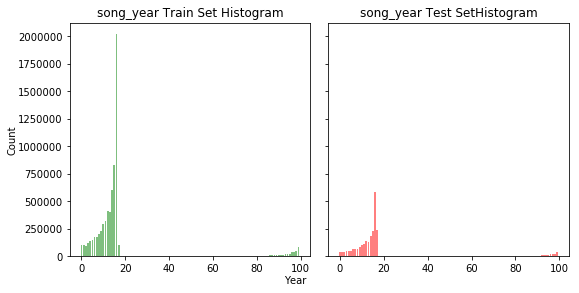

None


In [102]:
print (plot_bar(song_year_dict['train'],\
                song_year_dict['test'],\
                'song_year'))

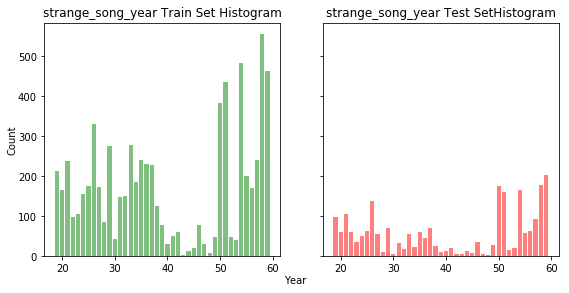

None


In [103]:
print (plot_bar({k: v for k, v in song_year_dict['train'].items() if k < 60 and k > 18},\
                {k: v for k, v in song_year_dict['test'].items() if k < 60 and k > 18},\
                'strange_song_year'))